In [1]:
using DifferentialEquations
using ArrheniusModel
include("Energies.jl")
include
pe = PhaseEnergies(G_values, Ea_constants)
display(pe.Ea_plus_ΔG)

In [ ]:
k = [2.0 1.0; 0.0 1.0]
f(u, p, t) = u*k
u0 = [0.0 0.0;0.0 0.0;0.0 0.0]
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), dt=0.5, saveat=0.5)


In [ ]:
k = [1.0 0.0; 0.0 1.0]
function f(u, p, t)
    du = copy(u)
    for i in 1:size(du, 1)
        du[i, :] += [1.0, 0.0]
    end
    return du*k
end
u0 = [0.0 0.0;0.0 0.0;0.0 0.0]
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), saveat=0.5)

In [ ]:
f(u, p, t) = 1.01 * u
u0 = 1 / 2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

using Plots
plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
    xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 0.5 * exp(1.01t), lw = 3, ls = :dash, label = "True Solution!")

In [ ]:
f(u, p, t) = 1.01 * u
u0 = 1 / 2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), saveat = 0.1)

using Plots
plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
    xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 0.5 * exp(1.01t), lw = 3, ls = :dash, label = "True Solution!")

In [ ]:
f(u, p, t) = 1.01 * u
u0 = 1 / 2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), saveat = 0.1)

In [ ]:
using Surrogates
bounds = [(0.0, 1.0), (0.0, 1.0)]
function f(x)
    return sum(x.^2)
end
surrogate = RadialBasis(f, bounds)
adaptive_sample = AdaptiveSampling(surrogate, bounds, n_samples)


In [ ]:
using DifferentialEquations, DiffEqFlux, Optim

# Define the neural ODE function
function dudt(u, p, t)
    return p .* u
end

# Initial condition and time span
u0 = [2.0]
tspan = (0.0, 1.0)

# ODE problem
prob = ODEProblem(dudt, u0, tspan, [0.5])

# Neural ODE prediction function
predict_n_ode(p) = solve(prob, Tsit5(), p = p).u[end]

# Loss function
loss_n_ode(p) = sum(abs2, predict_n_ode(p) .- 1.0)

# Optimize the parameters
result = optimize(loss_n_ode, prob.p, BFGS())

# Optimized parameters
println(result.minimizer)

In [ ]:
u0 = zeros(5, 2)
tspan = (0.0, 2.5)

function matrix_diff!(du, u, p, t)
    for i in 1:5
        if t >= (i-1)*0.5 && t < i*0.5
            du[i, :] = [1.0, 0] - u[i, :]
        else
            du[i, :] = [0, 0]
        end
    end
end

prob = ODEProblem(matrix_diff!, u0, tspan)
sol = solve(prob, saveat = 0.1)

In [3]:
using ArrheniusModel

In [1]:
using DifferentialEquations

In [15]:
using Plots

In [4]:

# Define the parameters and initial conditions
#P = [1.0 1.0 0.2]
dt = 0.5
num_steps = 10
k = [0.1 0.2 0.3; 0.4 0.5 0.6; 0.7 0.8 0.9]
c0 = zeros(num_steps,3)  # Initial composition
fco = flow_coefficient("exponential", num_steps, 0.01)
# Define the ODE function

function odefunc!(dc, c, p, t)
    j = floor(Int, t / dt) + 1
    f = reverse(fco[j: num_steps+j-1])
    dc .= c .* f * k
    if j != j0
        c[j, 1] = 1.0
        j = j0
    end
end

odefunc! (generic function with 1 method)

In [7]:
j = 0
j0 = 0
dt = 0.5
tspan = (0.0, dt*(num_steps-1))

prob = ODEProblem(odefunc!, c0, tspan)
sol = solve(prob, Tsit5(), saveat = 0.3, dt=0.25)



retcode: Success
Interpolation: 1st order linear
t: 16-element Vector{Float64}:
 0.0
 0.3
 0.6
 0.9
 1.2
 1.5
 1.8
 2.1
 2.4
 2.7
 3.0
 3.3
 3.6
 3.9
 4.2
 4.5
u: 16-element Vector{Matrix{Float64}}:
 [0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [1.0093414865900432 0.0698701508993351 0.09969802032843837; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [1.0645897950741456 0.19057876195328077 0.2597282822527001; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [1.2079126289741977 0.38639013200058914 0.5080281884472644; 1.0043965792346563 0.06706693591434959 0.09586435082037646; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [1.4490750693534953 0.7016483432793067 0.8973821706254019; 1.084409573229837 0.1863554056080742 0.25442829621264484; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [1.8463344764354412 1.208048047395662 1.5129221717761663; 1.2266407604321379 0.38135219638906803 0.5021906905723318; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [2.4858951073619022 2.011418691049868 2.480102828158116; 1.4657227428178232 0.694516779

In [13]:
last_u = sol.u[end]

1000×3 Matrix{Float64}:
  5.04707e33   6.20141e33   7.35574e33
  5.04727e33   6.20165e33   7.35603e33
  5.04747e33   6.2019e33    7.35632e33
  5.04767e33   6.20215e33   7.35662e33
  5.0408e33    6.19369e33   7.34659e33
  4.96802e33   6.10427e33   7.24052e33
  4.96743e33   6.10355e33   7.23967e33
  4.96684e33   6.10282e33   7.2388e33
  4.96624e33   6.10208e33   7.23793e33
  4.96563e33   6.10134e33   7.23705e33
  ⋮                        
 47.1166      56.9916      67.7787
 22.8384      27.1389      32.3516
 11.1735      12.783       15.3046
  5.61807      5.93231      7.15872
  3.00043      2.68978      3.29131
  1.78549      1.16906      1.4648
  1.23585      0.46395      0.604223
  1.0          0.142418     0.197008
  1.0          0.0          0.0

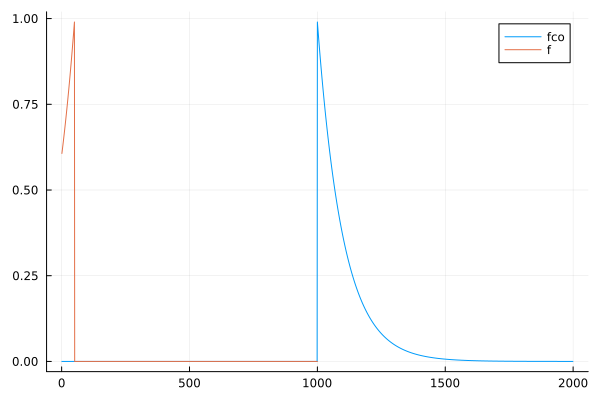

In [19]:
fco = flow_coefficient("exponential", num_steps, 0.01)
#add #num_steps of 1 in the front of fco
j = 50
f = reverse(fco[j: num_steps+j-1])
#plot fco and f
plot(fco, label = "fco")
plot!(f, label = "f")


In [ ]:
size(fco[1:10])

In [24]:
b = [1.0 0.1 10.0; 2.0 0.0 0.0]
f = [5; 10]
k = [1.0 0.0 0.0; 5.0 10.0 0.0; 0.0 0.0 1.0]
display(b)
display(k)
display(b*k)
j = floor(Int, 4 / dt)
b.*f*k

2×3 Matrix{Float64}:
 1.0  0.1  10.0
 2.0  0.0   0.0

3×3 Matrix{Float64}:
 1.0   0.0  0.0
 5.0  10.0  0.0
 0.0   0.0  1.0

2×3 Matrix{Float64}:
 1.5  1.0  10.0
 2.0  0.0   0.0

2×3 Matrix{Float64}:
  7.5  5.0  50.0
 20.0  0.0   0.0

In [48]:
# Define an array
a = [1, 2, 3, 4, 5]

# Define a scalar
b = 2

# Use .= to multiply each element of a by b in-place
a .= a .* b

# Now a is [2, 4, 6, 8, 10]

5-element Vector{Int64}:
  2
  4
  6
  8
 10